In [13]:
from bertopic import BERTopic
import csv
import os
from flair.embeddings import TransformerDocumentEmbeddings


# topic_model = BERTopic(embedding_model=roberta)


os.environ["TOKENIZERS_PARALLELISM"] = "false"

url = 'hmds/steam_reviews_hmds_include_stopword.csv'
docs = []
with open(url, 'r', encoding='UTF-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if row:
            docs.append(row[0])
docs = docs[1:]
# models: all-MiniLM-L6-v2, all-mpnet-base-v2
# roberta = TransformerDocumentEmbeddings('roberta-base')

# embedding_model="all-mpnet-base-v2",
# calculate_probabilities=True
num_topics = 20
model = BERTopic(embedding_model="all-mpnet-base-v2",
                 nr_topics=num_topics,
                 diversity=0.2, 
                 top_n_words=15,
                verbose=True)
topics, probabilities = model.fit_transform(docs)

print(model.get_topic_freq().head())


Batches:   0%|          | 0/3565 [00:00<?, ?it/s]

2023-01-15 16:54:14,962 - BERTopic - Transformed documents to Embeddings
2023-01-15 16:55:03,059 - BERTopic - Reduced dimensionality
2023-01-15 16:55:09,610 - BERTopic - Clustered reduced embeddings
2023-01-15 16:55:46,867 - BERTopic - Reduced number of topics from 895 to 21


   Topic  Count
0     -1  84017
1      0   2996
2      1   2264
3      2   1955
4      3   1855


In [14]:
model.get_topic_info()[1:num_topics]

,Topic,Count,Name
1,0,2996,0_gun_guns_controller_grip
2,1,2264,1_touch_rift_cosmos_controllers
3,2,1955,2_index_controllers_support_controller
4,3,1855,3_must_headset_recommend_get
5,4,1781,4_x90_quest_desktop_virtual
6,5,1710,5_10_headset_recommend_highly
7,6,1701,6_htc_ok_sounded_played
8,7,1620,7_controls_intuitive_control_simple
9,8,1613,8_worth_free_rift_price
10,9,1541,9_gtx_ram_i7_rift


In [15]:
for i in range(num_topics):
    print(model.get_topic(i))

[('gun', 0.07004995814822519), ('guns', 0.048789066835408776), ('controller', 0.0354670308002543), ('grip', 0.03415539666850982), ('weapons', 0.03220540889202198), ('controls', 0.029307038277706924), ('handed', 0.029103800961928356), ('controllers', 0.028130465511737927), ('shooting', 0.01951630169615247), ('aim', 0.019103594347867837), ('hands', 0.019056000478731322), ('reloading', 0.01726121632588689), ('aiming', 0.015482052108255765), ('pistol', 0.015037489950321212), ('game', 0.014214074046888422)]
[('touch', 0.16944861277412837), ('rift', 0.10498529482874541), ('cosmos', 0.08125781531358267), ('controllers', 0.06820185220931584), ('xbox', 0.056066264583851506), ('controller', 0.038546299236851586), ('fine', 0.02337456859904014), ('doesnt', 0.021031963783824884), ('support', 0.02069180288616342), ('play', 0.01779804508496615), ('htc', 0.01669878294419246), ('controls', 0.016003250806551836), ('worked', 0.013681044275018131), ('simulator', 0.013252236934838017), ('issues', 0.0120270

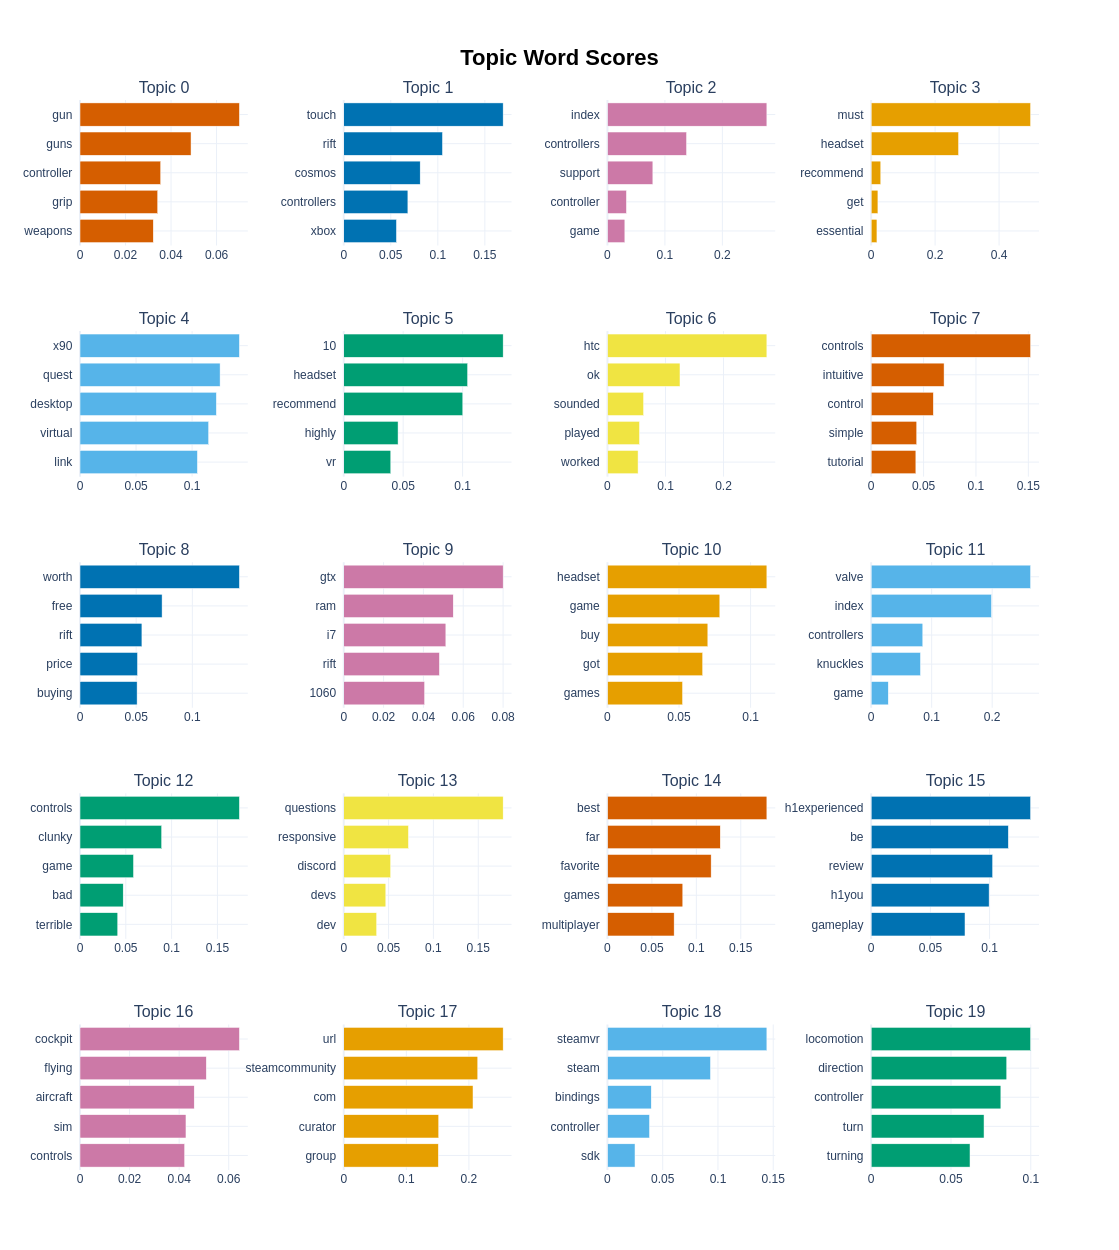

In [16]:
model.visualize_barchart(top_n_topics=num_topics)

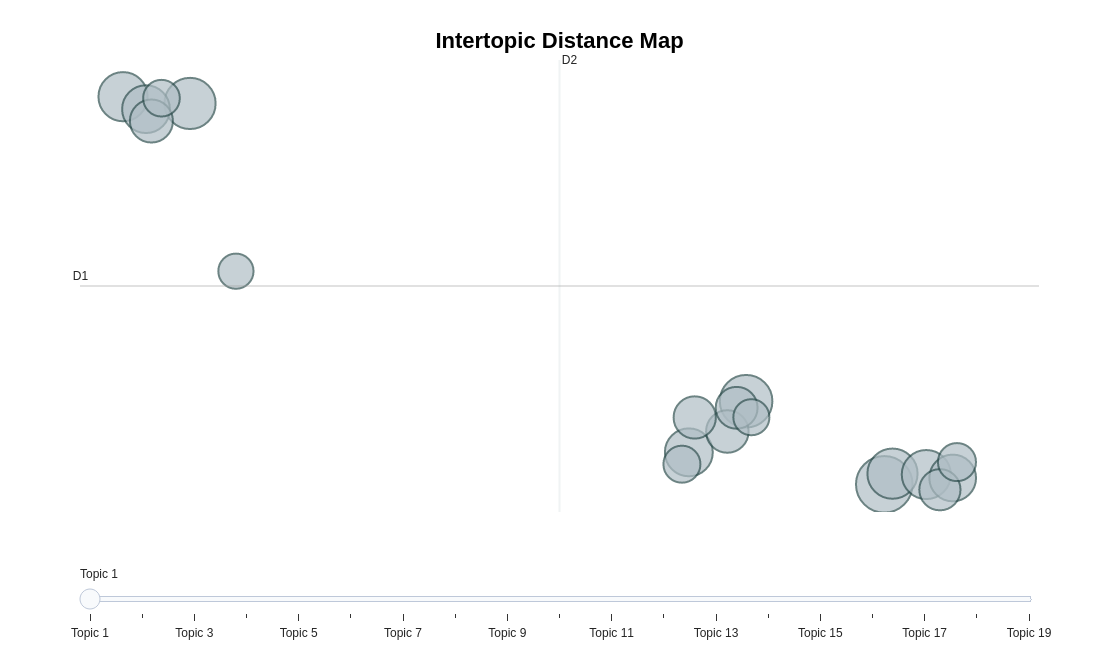

In [17]:
model.visualize_topics()

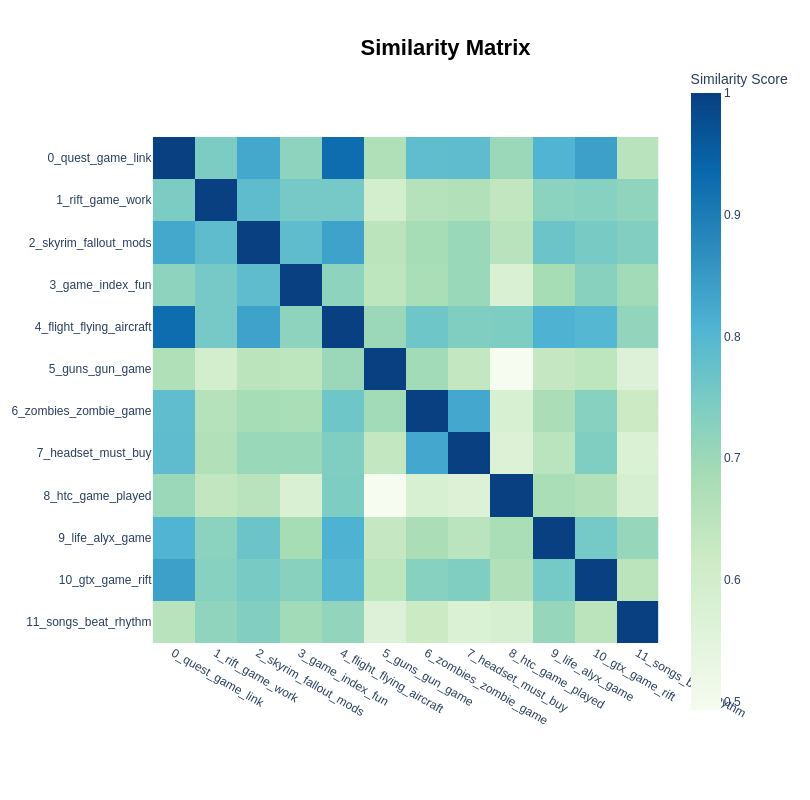

In [12]:
model.visualize_heatmap(top_n_topics=12)